In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.utils import to_categorical,plot_model

In [ ]:
d = pd.read_csv('../LAB6/monthly_ocean_csv.csv')

# Part 1

## Time-step features

In [ ]:
tunnel = pd.read_csv('../LAB6/tunnel.csv')
tunnel.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [ ]:
tunnel['Time'] = np.arange(len(tunnel.index))

tunnel.head()

,Day,NumVehicles,Time
0,2003-11-01,103536,0
1,2003-11-02,92051,1
2,2003-11-03,100795,2
3,2003-11-04,102352,3
4,2003-11-05,106569,4


In [ ]:
# target = weight * time + bias
lr = LinearRegression()
lr.fit(np.array(tunnel['Time']).reshape(-1, 1), list(tunnel['NumVehicles']))

LinearRegression()

In [ ]:
lr.coef_, lr.intercept_

(array([22.49744953]), 98176.20634409295)

In [ ]:
x_points = [tunnel['Time'].min(), tunnel['Time'].max()]
y_points = [tunnel['Time'].min()*lr.coef_ + lr.intercept_ , tunnel['Time'].max()*lr.coef_+lr.intercept_]

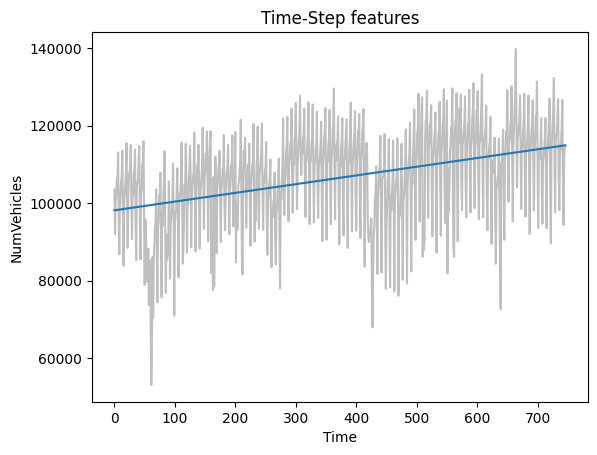

In [ ]:
fig, ax = plt.subplots()
ax.plot('Time', 'NumVehicles', data=tunnel, color='0.75')
ax.plot(x_points, y_points)
ax.set_xlabel('Time')
ax.set_ylabel('NumVehicles')
ax.set_title('Time-Step features')
plt.show()

## Lag features

In [ ]:
tunnel = pd.read_csv('../LAB6/tunnel.csv')
tunnel.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [ ]:
tunnel['Lag_1'] = tunnel['NumVehicles'].shift(1)
tunnel = tunnel.reindex(columns=['NumVehicles', 'Lag_1'])
tunnel.head()

,NumVehicles,Lag_1
0,103536,NaN
1,92051,103536.0
2,100795,92051.0
3,102352,100795.0
4,106569,102352.0


In [ ]:
# Linear Regression
# target = weight * lag + bias

X = tunnel.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = tunnel.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

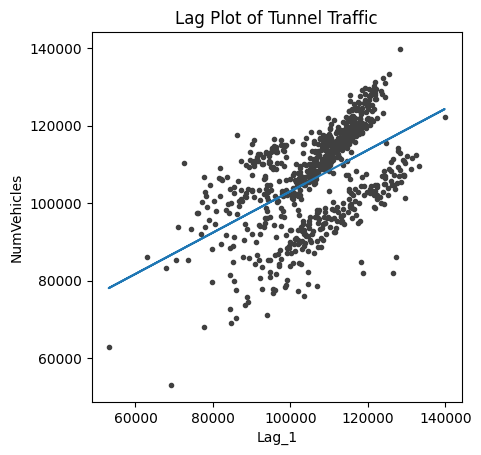

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')
plt.show()

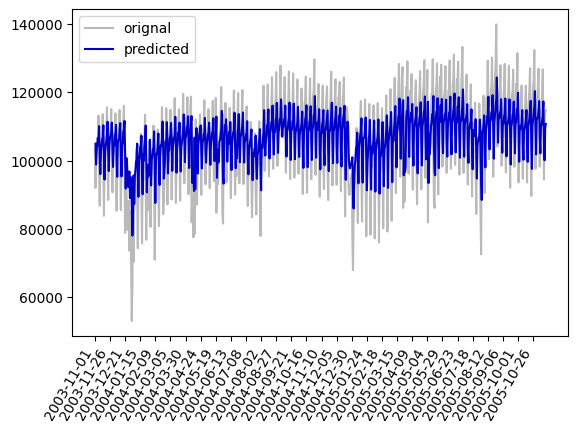

In [ ]:
tunnel_ = pd.read_csv('../LAB6/tunnel.csv')
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(tunnel_['Day'], tunnel_['NumVehicles'], color='darkgray', alpha=0.8, label='orignal')
plt.plot(y_pred, color='mediumblue', label='predicted')
plt.legend()
ax.set_xticks([i for i in list(tunnel_['Day'])[::25]])
plt.xticks(rotation = 60)
plt.show()

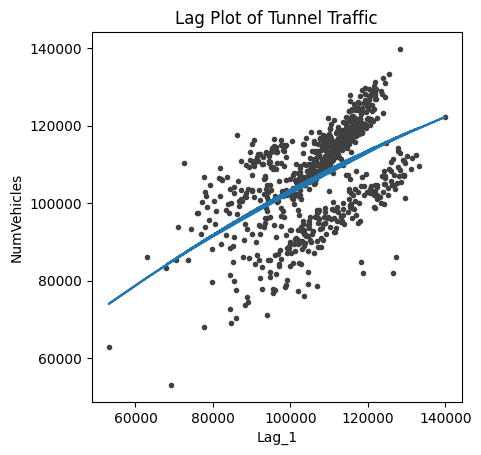

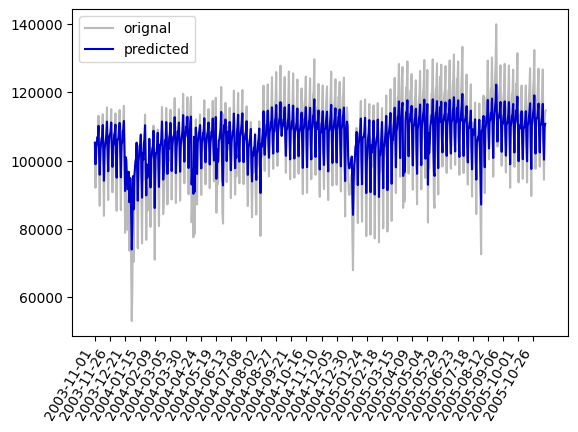

In [ ]:
# ploynomial regression
X = tunnel.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = tunnel.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner')

poly = PolynomialFeatures(2)
new_x = poly.fit_transform(X)

model = LinearRegression()
model.fit(new_x, y)

y_pred = pd.Series(model.predict(new_x))

# plotting
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
# ax.scatter(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')
plt.show()

tunnel_ = pd.read_csv('../LAB6/tunnel.csv')
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(tunnel_['Day'], tunnel_['NumVehicles'], color='darkgray', alpha=0.8, label='orignal')
plt.plot(y_pred, color='mediumblue', label='predicted')
plt.legend()
ax.set_xticks([i for i in list(tunnel_['Day'])[::25]])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
# ANN
inputs = Input(shape = (1))
x = Dense(8,activation = 'relu')(inputs)
x = Dense(16,activation = 'relu')(x)
x = Dense(8,activation = 'relu')(x)
outputs = Dense(1,activation = 'linear')(x)
model = Model(inputs,outputs)
model.summary()

Model: "model_1"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 16        
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 305 (1.19 KB)
Trainable params: 305 (1.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'mse',optimizer = 'adam')

In [ ]:
X = tunnel.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = tunnel.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner')

history1 = model.fit(X,y,epochs = 20,batch_size = 32)

Epoch 1/20
24/24 [==============================] - 0s 516us/step - loss: 10233715712.0000
Epoch 2/20
24/24 [==============================] - 0s 390us/step - loss: 7429502464.0000
Epoch 3/20
24/24 [==============================] - 0s 342us/step - loss: 5129436672.0000
Epoch 4/20
24/24 [==============================] - 0s 353us/step - loss: 3010029568.0000
Epoch 5/20
24/24 [==============================] - 0s 340us/step - loss: 1384015488.0000
Epoch 6/20
24/24 [==============================] - 0s 315us/step - loss: 472546464.0000
Epoch 7/20
24/24 [==============================] - 0s 340us/step - loss: 183758272.0000
Epoch 8/20
24/24 [==============================] - 0s 340us/step - loss: 145002832.0000
Epoch 9/20
24/24 [==============================] - 0s 359us/step - loss: 144908320.0000
Epoch 10/20
24/24 [==============================] - 0s 364us/step - loss: 144623600.0000
Epoch 11/20
24/24 [==============================] - 0s 356us/step - loss: 144658272.0000
Epoch 12/20
2

24/24 [==============================] - 0s 763us/step


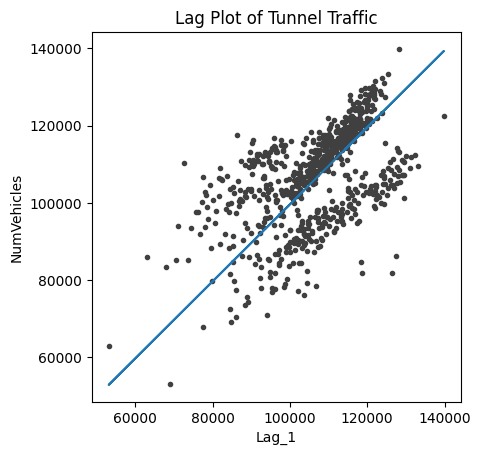

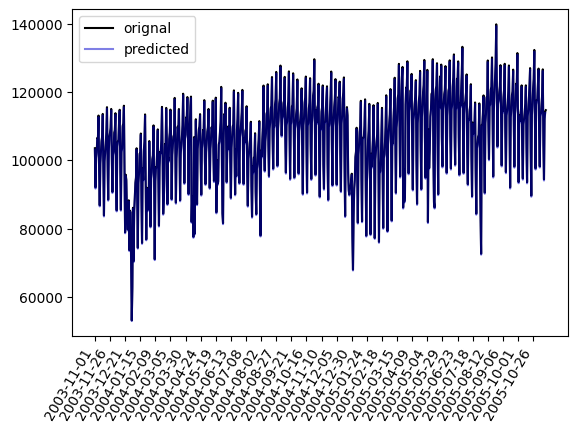

In [ ]:
y_pred = pd.Series(model.predict(X)[:,0])

# plotting
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
# ax.scatter(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')
plt.show()

tunnel_ = pd.read_csv('../LAB6/tunnel.csv')
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(tunnel_['Day'], tunnel_['NumVehicles'], color='black', alpha=1, label='orignal')
plt.plot(y_pred, color='mediumblue', label='predicted', alpha= 0.5)
plt.legend()
ax.set_xticks([i for i in list(tunnel_['Day'])[::25]])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
# pd.DataFrame([y_pred,y]).T

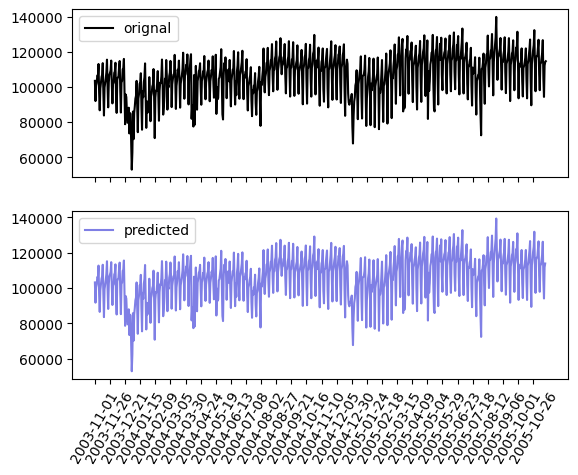

In [ ]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(tunnel_['Day'], tunnel_['NumVehicles'], color='black', alpha=1, label='orignal')
axs[1].plot(tunnel_['Day'][:-1],y_pred, color='mediumblue', label='predicted', alpha= 0.5)
axs[1].set_xticks([i for i in list(tunnel_['Day'])[::25]])
axs[1].set_xticklabels([i for i in list(tunnel_['Day'])[::25]])
plt.xticks(rotation = 60)
axs[0].legend()
axs[1].legend()
plt.show()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 6         
                                                                 
 dense_9 (Dense)             (None, 3)                 12        
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
24/24 [==============================] - 0s 379us/step - loss: 20757487616.0000
Epoch 2/20
24/24 [==============================] - 0s 366us/step 

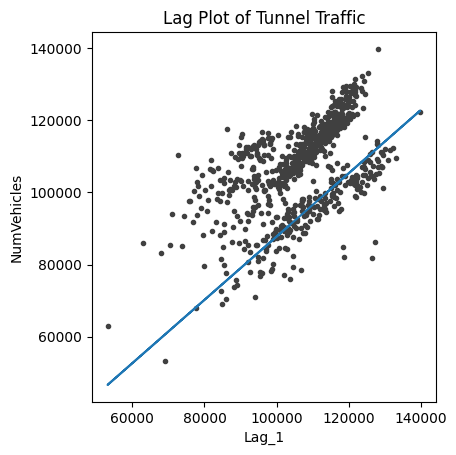

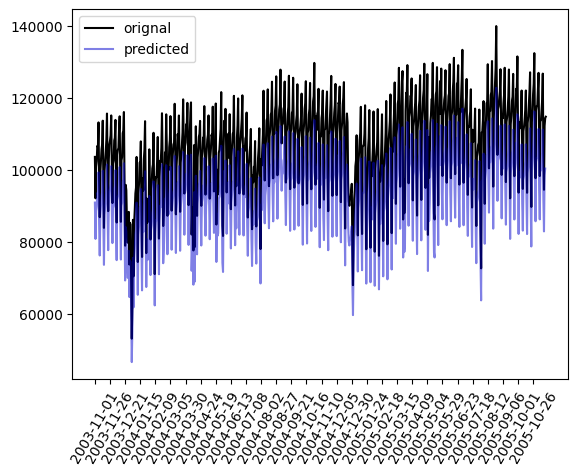

In [ ]:
# ANN (smaller model)
inputs = Input(shape = (1))
x = Dense(3,activation = 'relu')(inputs)
# x = Dense(16,activation = 'relu')(x)
x = Dense(3,activation = 'relu')(x)
outputs = Dense(1,activation = 'linear')(x)
model = Model(inputs,outputs)
model.summary()

model.compile(loss = 'mse',optimizer = 'adam')

X = tunnel.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = tunnel.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner')

history1 = model.fit(X,y,epochs = 20,batch_size = 32)

y_pred = pd.Series(model.predict(X)[:,0])

# plotting
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
# ax.scatter(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')
plt.show()

tunnel_ = pd.read_csv('../LAB6/tunnel.csv')
fig, ax = plt.subplots()
# fig.autofmt_xdate()
plt.plot(tunnel_['Day'], tunnel_['NumVehicles'], color='black', alpha=1, label='orignal')
plt.plot(y_pred, color='mediumblue', label='predicted', alpha= 0.5)
plt.legend()
ax.set_xticks([i for i in list(tunnel_['Day'])[::25]])
plt.xticks(rotation = 60)
plt.show()

# PART 2

In [ ]:
data = pd.read_excel('../LAB6/Covid-19 SG.xlsx')

In [ ]:
data.head()

,Date,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,...,Cumulative Individuals Vaccinated,Cumulative Individuals Vaccination Completed,Perc population completed at least one dose,Perc population completed vaccination,Sinovac vaccine doses,Cumulative individuals using Sinovac vaccine,Doses of other vaccines recognised by WHO,Cumulative individuals using other vaccines recognised by WHO,Number taken booster shots,Perc population taken booster shots
0,2020-01-23,1.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-24,2.0,NaN,3.0,0.0,0.0,0.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-25,1.0,NaN,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-26,0.0,NaN,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-27,1.0,NaN,5.0,0.0,0.0,0.0,0.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid = data[['Date', 'Daily Confirmed','Daily Discharged','Discharged to Isolation','Still Hospitalised', 'Daily Deaths',
       'Cumulative Deaths', 'Tested positive demise','Intensive Care Unit (ICU)','Requires Oxygen Supplementation or Unstable','Perc population completed at least one dose',
       'Perc population completed vaccination', 'Sinovac vaccine doses','Number taken booster shots', 'Perc population taken booster shots']]

In [ ]:
covid

,Date,Daily Confirmed,Daily Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,Cumulative Deaths,Tested positive demise,Intensive Care Unit (ICU),Requires Oxygen Supplementation or Unstable,Perc population completed at least one dose,Perc population completed vaccination,Sinovac vaccine doses,Number taken booster shots,Perc population taken booster shots
0,2020-01-23,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-24,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-25,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-26,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-27,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,2022-11-05,2686.0,4003.0,NaN,NaN,1.0,1686.0,NaN,16.0,44.0,0.92,0.92,NaN,NaN,0.8
1018,2022-11-06,1893.0,NaN,NaN,NaN,1.0,1687.0,NaN,15.0,41.0,NaN,NaN,NaN,NaN,NaN
1019,2022-11-07,1676.0,NaN,NaN,NaN,3.0,1690.0,NaN,16.0,31.0,NaN,NaN,NaN,NaN,NaN
1020,2022-11-08,NaN,NaN,NaN,NaN,1.0,1691.0,NaN,14.0,28.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid = covid.fillna(0)

In [ ]:
covid

,Date,Daily Confirmed,Daily Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,Cumulative Deaths,Tested positive demise,Intensive Care Unit (ICU),Requires Oxygen Supplementation or Unstable,Perc population completed at least one dose,Perc population completed vaccination,Sinovac vaccine doses,Number taken booster shots,Perc population taken booster shots
0,2020-01-23,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
1,2020-01-24,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
2,2020-01-25,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
3,2020-01-26,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
4,2020-01-27,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,2022-11-05,2686.0,4003.0,0.0,0.0,1.0,1686.0,0.0,16.0,44.0,0.92,0.92,0.0,0.0,0.8
1018,2022-11-06,1893.0,0.0,0.0,0.0,1.0,1687.0,0.0,15.0,41.0,0.00,0.00,0.0,0.0,0.0
1019,2022-11-07,1676.0,0.0,0.0,0.0,3.0,1690.0,0.0,16.0,31.0,0.00,0.00,0.0,0.0,0.0
1020,2022-11-08,0.0,0.0,0.0,0.0,1.0,1691.0,0.0,14.0,28.0,0.00,0.00,0.0,0.0,0.0


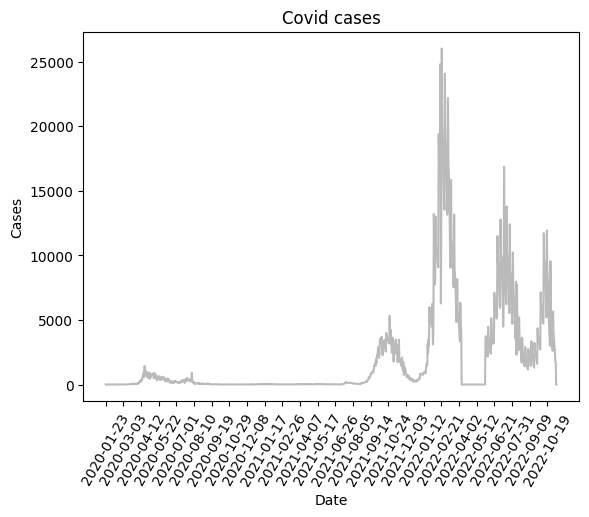

In [ ]:
fig, ax = plt.subplots()
ax.plot(covid['Date'], covid['Daily Confirmed'], color='darkgray', alpha=0.8, label='daily cases')
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('Covid cases')
ax.set_xticks([i for i in list(covid['Date'])[::40]])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
def make_lags(df, lags):
    ret_df = pd.concat({f'lag_{i}_':df.shift(i) for i in range(1,lags+1)},axis=1)
    columns = [''.join(col).strip() for col in ret_df.columns.values]
    ret_df.columns = columns
    return ret_df


In [ ]:
covid.columns

Index(['Date', 'Daily Confirmed', 'Daily Discharged',
       'Discharged to Isolation', 'Still Hospitalised', 'Daily Deaths',
       'Cumulative Deaths', 'Tested positive demise',
       'Intensive Care Unit (ICU)',
       'Requires Oxygen Supplementation or Unstable',
       'Perc population completed at least one dose',
       'Perc population completed vaccination', 'Sinovac vaccine doses',
       'Number taken booster shots', 'Perc population taken booster shots'],
      dtype='object')

In [ ]:
X = covid.loc[:, covid.columns != 'Daily Confirmed']
y = covid['Daily Confirmed']

In [ ]:
X0 = make_lags(X.iloc[:,1:], lags=2)

In [ ]:
X = pd.concat([X.iloc[:,1:], X0], axis=1)

In [ ]:
X.columns

Index(['Daily Discharged', 'Discharged to Isolation', 'Still Hospitalised',
       'Daily Deaths', 'Cumulative Deaths', 'Tested positive demise',
       'Intensive Care Unit (ICU)',
       'Requires Oxygen Supplementation or Unstable',
       'Perc population completed at least one dose',
       'Perc population completed vaccination', 'Sinovac vaccine doses',
       'Number taken booster shots', 'Perc population taken booster shots',
       'lag_1_Daily Discharged', 'lag_1_Discharged to Isolation',
       'lag_1_Still Hospitalised', 'lag_1_Daily Deaths',
       'lag_1_Cumulative Deaths', 'lag_1_Tested positive demise',
       'lag_1_Intensive Care Unit (ICU)',
       'lag_1_Requires Oxygen Supplementation or Unstable',
       'lag_1_Perc population completed at least one dose',
       'lag_1_Perc population completed vaccination',
       'lag_1_Sinovac vaccine doses', 'lag_1_Number taken booster shots',
       'lag_1_Perc population taken booster shots', 'lag_2_Daily Discharged',
    

In [ ]:
X.dropna(inplace=True)
y, X = y.align(X, join='inner')
X = np.asarray(X).astype('float32')

In [ ]:
X.shape, y.shape

((1020, 39), (1020,))

In [ ]:
# ANN
inputs = Input(shape = (39,))
x = Dense(8,activation = 'relu')(inputs)
x = Dense(16,activation = 'relu')(x)
x = Dense(8,activation = 'relu')(x)
outputs = Dense(1,activation = 'linear')(x)
model = Model(inputs,outputs)
model.summary()

model.compile(loss = 'mse',optimizer = 'adam')

history1 = model.fit(X,y,epochs = 20,batch_size = 32)

Model: "model_6"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 39)]              0         
                                                                 
 dense_23 (Dense)            (None, 8)                 320       
                                                                 
 dense_24 (Dense)            (None, 16)                144       
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 1)                 9         
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
32/32 [============================

32/32 [==============================] - 0s 326us/step


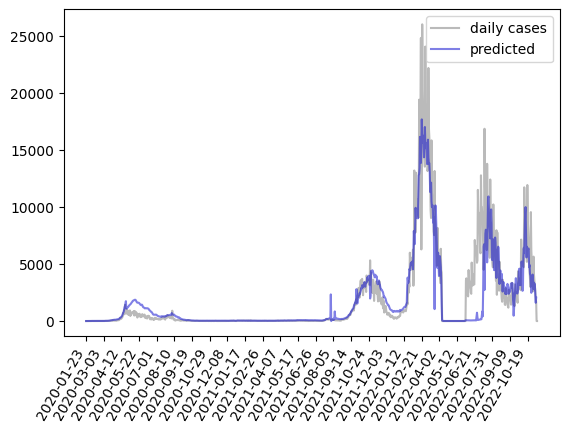

In [ ]:
y_pred = pd.Series(model.predict(X)[:,0])

# plotting
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.plot(covid['Date'], covid['Daily Confirmed'], color='darkgray', alpha=0.8, label='daily cases')
ax.plot(y_pred, color='mediumblue', label='predicted', alpha= 0.5)
plt.legend()
ax.set_xticks([i for i in list(covid['Date'])[::40]])
plt.xticks(rotation = 60)
plt.show()

# PART 3

## Trend

In [ ]:
tunnel = pd.read_csv('../LAB6/tunnel.csv', parse_dates=['Day'])
tunnel = tunnel.set_index("Day").to_period()
tunnel

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569
...,...
2005-11-12,104646
2005-11-13,94424
2005-11-14,112165


In [ ]:
moving_average = tunnel.rolling(
    window=30,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=15,  # choose about half the window size
).mean()

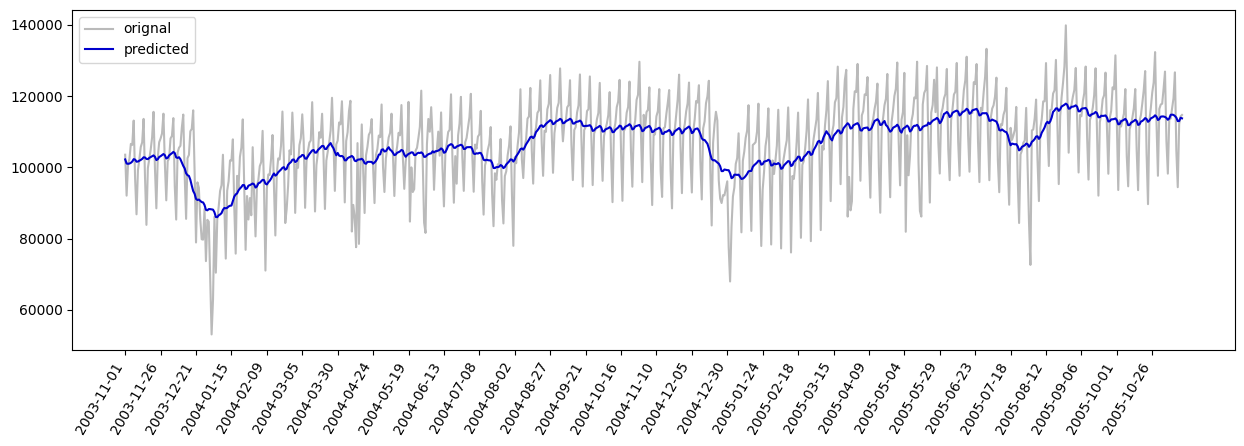

In [ ]:
tunnel_ = pd.read_csv('../LAB6/tunnel.csv')
fig, ax = plt.subplots(figsize=(15, 5))
fig.autofmt_xdate()
plt.plot(tunnel_['Day'], tunnel_['NumVehicles'], color='darkgray', alpha=0.8, label='orignal')
plt.plot(list(moving_average['NumVehicles']), color='mediumblue', label='predicted')
plt.legend()
ax.set_xticks([i for i in list(tunnel_['Day'])[::25]])
plt.xticks(rotation = 60)
plt.show()

In [ ]:
tunnel['MA'] = moving_average['NumVehicles']

tunnel.head()

,NumVehicles,MA
Day,,
2003-11-01,103536,102208.933333
2003-11-02,92051,101061.375000
2003-11-03,100795,100985.411765
2003-11-04,102352,101057.388889
2003-11-05,106569,101262.315789


In [ ]:
tunnel['Lag_1_NumVehicles'] = tunnel['NumVehicles'].shift(1)
tunnel['Lag_1_MA'] = tunnel['MA'].shift(1)

tunnel.head()

,NumVehicles,MA,Lag_1_NumVehicles,Lag_1_MA
Day,,,,
2003-11-01,103536,102208.933333,NaN,NaN
2003-11-02,92051,101061.375000,103536.0,102208.933333
2003-11-03,100795,100985.411765,92051.0,101061.375000
2003-11-04,102352,101057.388889,100795.0,100985.411765
2003-11-05,106569,101262.315789,102352.0,101057.388889


In [ ]:
tunnel = tunnel.reindex(columns=['NumVehicles',	'MA','Lag_1_NumVehicles','Lag_1_MA'])
X = tunnel.loc[:, ['MA','Lag_1_NumVehicles','Lag_1_MA']]
X.dropna(inplace=True)
y = tunnel.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner')


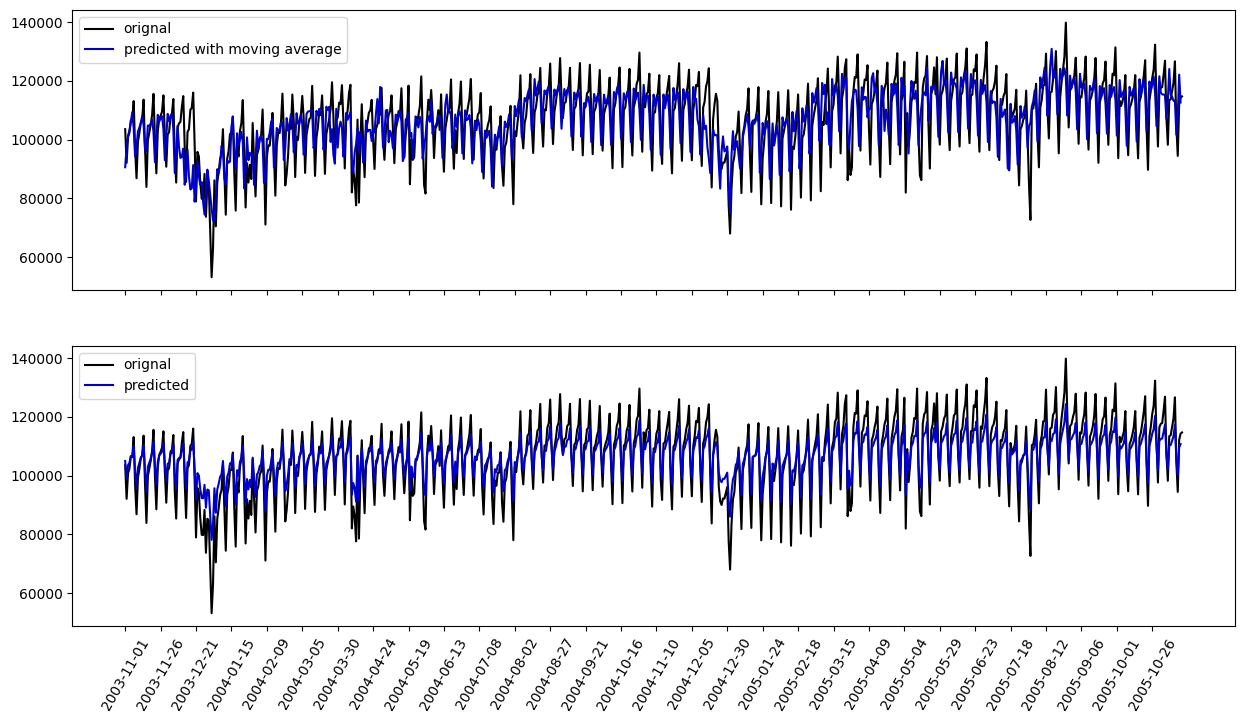

In [ ]:
model = LinearRegression()
model.fit(X, y)

y_pred1 = pd.Series(model.predict(X), index=X.index)

model = LinearRegression()
model.fit(np.array(X['Lag_1_NumVehicles']).reshape(-1,1), y)

y_pred2 = pd.Series(model.predict(np.array(X['Lag_1_NumVehicles']).reshape(-1,1)), index=X.index)

tunnel_ = pd.read_csv('../LAB6/tunnel.csv')
fig, axs = plt.subplots(2, figsize=(15,8) ,sharex=True)
axs[0].plot(tunnel_['Day'], tunnel_['NumVehicles'], color='black', alpha=1, label='orignal')
axs[0].plot(list(y_pred1), color='mediumblue', label='predicted with moving average')

axs[1].plot(tunnel_['Day'], tunnel_['NumVehicles'], color='black', alpha=1, label='orignal')
axs[1].plot(list(y_pred2), color='mediumblue', label='predicted')
axs[1].set_xticks([i for i in list(tunnel_['Day'])[::25]])
axs[1].set_xticklabels([i for i in list(tunnel_['Day'])[::25]])
plt.xticks(rotation = 60)
axs[0].legend()
axs[1].legend()
plt.show()

## seasonality

In [ ]:
x = np.arange(0,100)
y1 = np.cos(x)
y2 = x.copy()

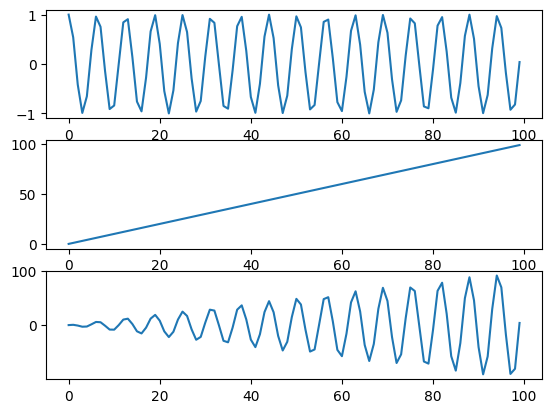

In [ ]:
plt.subplot(3,1,1)
plt.plot(x,y1)

plt.subplot(3,1,2)
plt.plot(x,y2)

plt.subplot(3,1,3)
plt.plot(x,y1*y2)


In [ ]:
tunnel = pd.read_csv('../LAB6/tunnel.csv', parse_dates=['Day'])
tunnel.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [ ]:
tunnel = tunnel.set_index("Day").to_period("D")
tunnel

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569
...,...
2005-11-12,104646
2005-11-13,94424
2005-11-14,112165


In [ ]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

simplefilter("ignore")

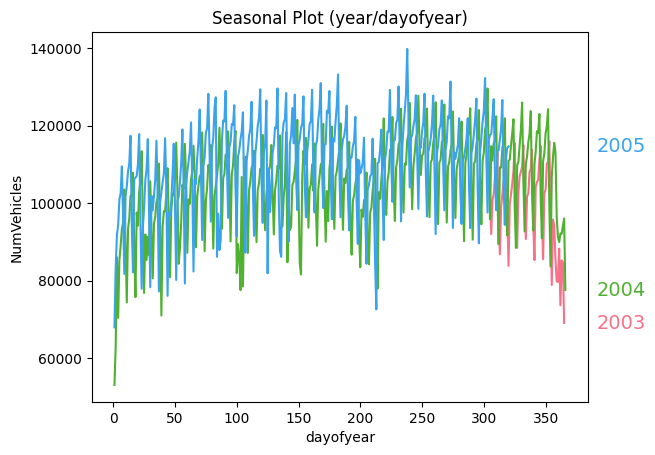

In [ ]:
X = tunnel.copy()

X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, ax = plt.subplots()
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax);

In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()

In [ ]:
# X

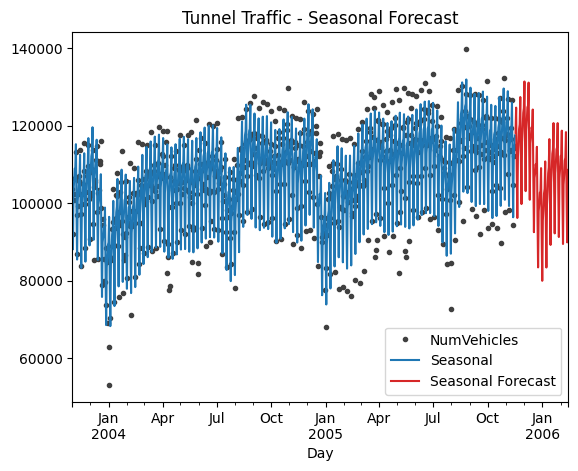

In [ ]:

y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()